# Logistic Regression - Example


Scikit-learn is a free machine learning library for python. We can easily implement logistic regression with [Scikit-learn](https://www.google.com/search?q=scikit+learn&rlz=1C5CHFA_enES992ES992&oq=scikit+learn&gs_lcrp=EgZjaHJvbWUyDggAEEUYJxg5GIAEGIoFMgwIARAjGCcYgAQYigUyBwgCEAAYgAQyBwgDEAAYgAQyBwgEEAAYgAQyBwgFEAAYgAQyBggGEEUYPDIGCAcQRRg90gEIMjMxMWowajeoAgCwAgA&sourceid=chrome&ie=UTF-8) using the LogisticRegression class. 

After creating a logistic regression object, we can obtain the line that best fits our data by calling the fit method. You can learn more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

So let's see how this works!

In [2]:
# First things first, we always need to import the libraries. 
from sklearn import datasets
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

# PENGUINS CLASSIFICATION - GENTOO OR ADELIE?

## 1. Getting the data
Today we are dealing with some real-world data to apply our brand new logistic regression model. And the first example we will see together is how to classify penguins species.
We are using a Kaggle [Penguins dataset](https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification).

In [2]:
# Load Penguins dataset. 
df = pd.read_csv("Files/Logistic_regression/penguins_binary_classification.csv")
df = df.drop(columns="year")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


## 2. Some first analysis
Some first analysis to further get the idea of what data we have in out table. 

In [3]:
# Checking our dataset
df.describe() #describes are data 

df.info() #gives information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
dtypes: float64(4), object(2)
memory usage: 13.0+ KB


species
Adelie    151
Gentoo    123
Name: count, dtype: int64


/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_45155/3618207599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["species"], palette=["purple", "orange"])


<Axes: xlabel='count', ylabel='species'>

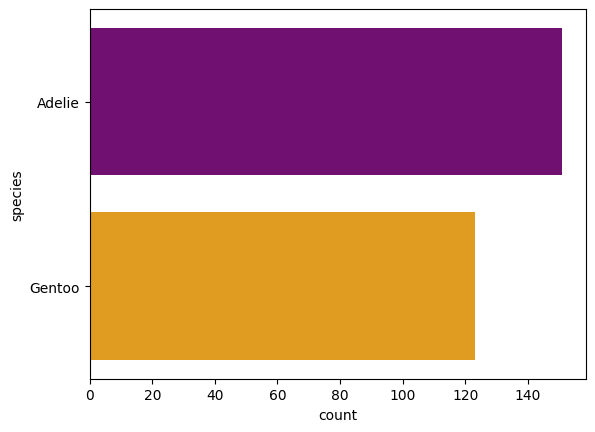

In [4]:
#We can check the distribution of individuals we have for each specie. Remember that strongly imabalanced datasets can be a problem. 
print(df["species"].value_counts())
sns.countplot(df["species"], palette=["purple", "orange"])

## 3. Understanding our data

### HEATMAP 
To understand what variables have a strong impact in our penguin species, we can use different commands. 
The first one is a Heat Map, that visually represents the correlation between all pairs of numeric columns within our DataFrame. 
The correlation range to 1 to -1 and indicates the strength and direction of their relationship. 

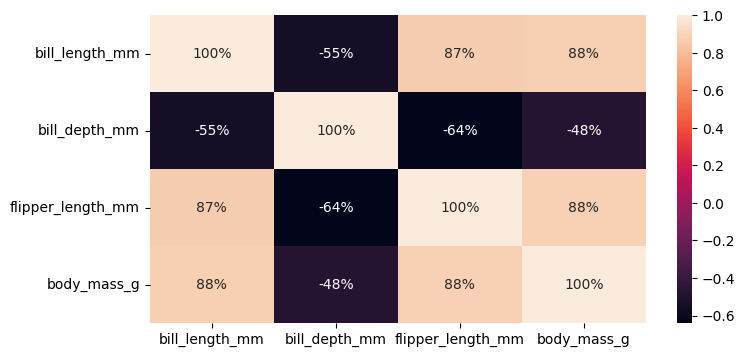

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 4))

import seaborn as sns
sns.heatmap(numeric_df.corr(), annot=True, fmt=".0%")
plt.show()


### PAIR PLOT

It generates a grid of scatter plots, each showing the relationship between two different variables in the dataset and with colors based on species.
This provides an overview of how different variables interact and how these interactions vary by species.

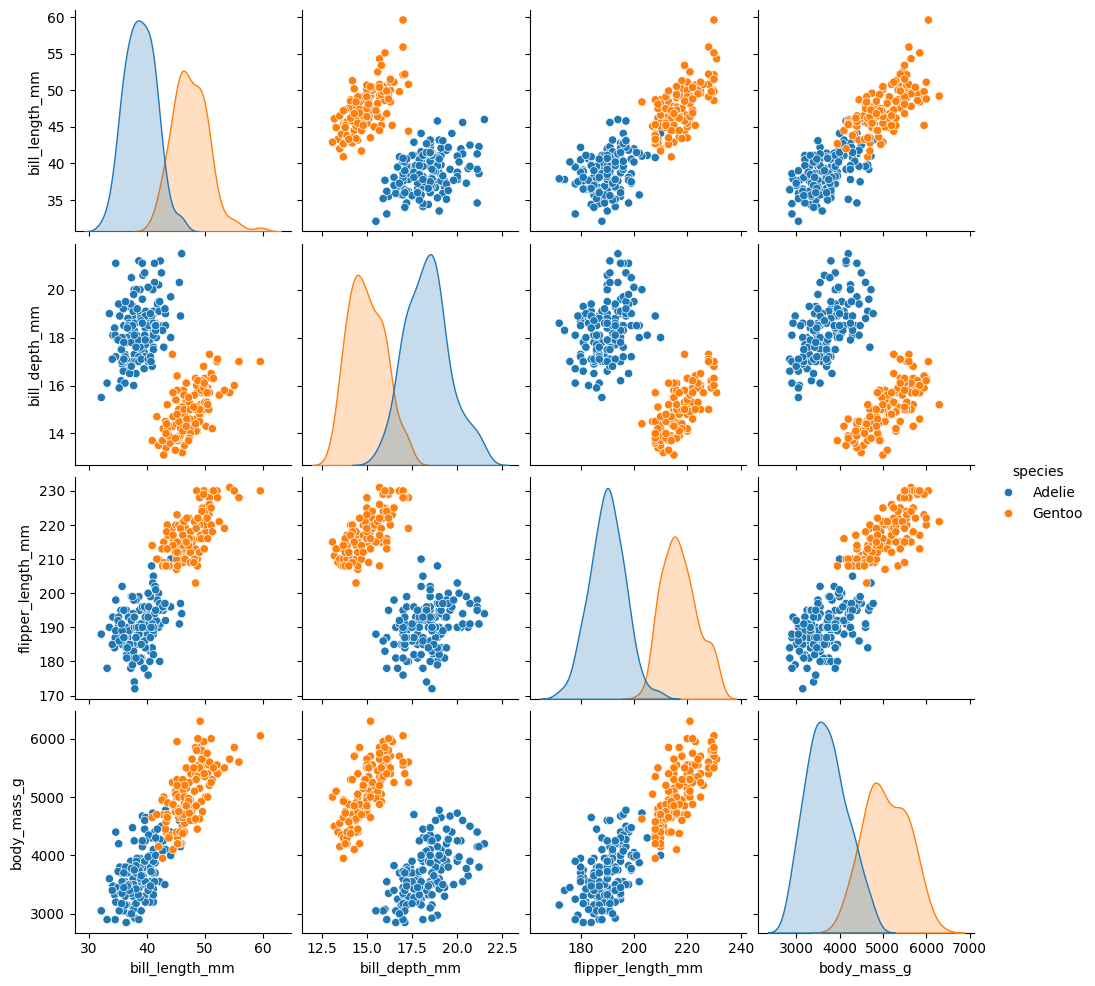

In [6]:
#let Create a pair plot of some columns 
df_temp = df.drop(columns=["bill_length_mm", "body_mass_g"])
sns.pairplot(df.iloc[:,:],hue='species')  # graph also  tell us about the the realationship between the two columns 

## 3. FIRST CLASSIFICATION - 1 variable to 2 classes.

#### Training the model

In [26]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


In [27]:
df_dummy

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
27,37.9,18.6,172.0,3150.0,1,0,1,0,0
19,37.8,18.3,174.0,3400.0,1,0,1,0,0
121,40.2,17.0,176.0,3450.0,1,0,0,0,1
30,37.2,18.1,178.0,3900.0,1,0,0,1,0
29,39.5,16.7,178.0,3250.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
216,49.8,16.8,230.0,5700.0,0,1,1,0,0
184,59.6,17.0,230.0,6050.0,0,1,1,0,0
226,48.6,16.0,230.0,5800.0,0,1,1,0,0
264,51.5,16.3,230.0,5500.0,0,1,1,0,0


Accuracy:  0.9854014598540146
A:  [[0.65313089]] B:  [-133.78660491]


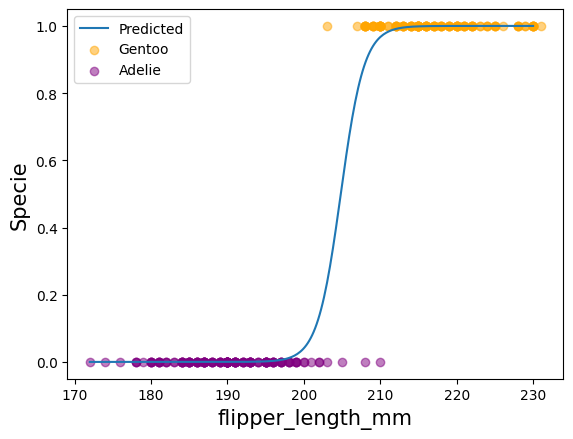

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# One-hot encode the categorical data and sort by flipper_length_mm
df_dummy = pd.get_dummies(df, dtype=int).sort_values(by='flipper_length_mm', ascending=True)

# Select the features and the target variable
X = df_dummy[['flipper_length_mm']]
Y = df_dummy["species_Gentoo"]

# Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=41)

# Fit the Logistic Regression model
log = LogisticRegression()
log.fit(X_train, Y_train)

# Define the sigmoid function
def sigmoid(x, A, B):
    return 1 / (1 + np.exp(-A*x - B))

# Apply the sigmoid function using the coefficients
# The .ravel() is used to convert the 2D array of coefficients to a 1D array for compatibility.
A = log.coef_
B = log.intercept_

# Create a range of values for X to plot the sigmoid function smoothly
X_range = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
Y_predicted = sigmoid(X_range, A, B)

# Plot the predicted probabilities
plt.plot(X_range, Y_predicted, label='Predicted')

X_gentoo = df_dummy[df_dummy["species_Gentoo"]==1]['flipper_length_mm'].values
X_adelie = df_dummy[df_dummy["species_Gentoo"]==0]['flipper_length_mm'].values

# Plot the actual values colored by class
plt.scatter(X_gentoo, Y[Y == 1], label='Gentoo', color='orange', alpha=0.5)
plt.scatter(X_adelie, Y[Y == 0], label='Adelie', color='purple', alpha=0.5)
plt.xlabel("flipper_length_mm",fontsize=15)
plt.ylabel("Specie",fontsize=15)

# Checking our accuracy
accuracy = log.score(X_test, Y_test)
print("Accuracy: ", accuracy)

print("A: ", log.coef_, "B: ", log.intercept_)

# Show the plot with legends
plt.legend()
plt.show()

#### Evaluating the model

Confusion Matrix:
 [[74  1]
 [ 0 62]]


/Users/josepferrersanchez/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/josepferrersanchez/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


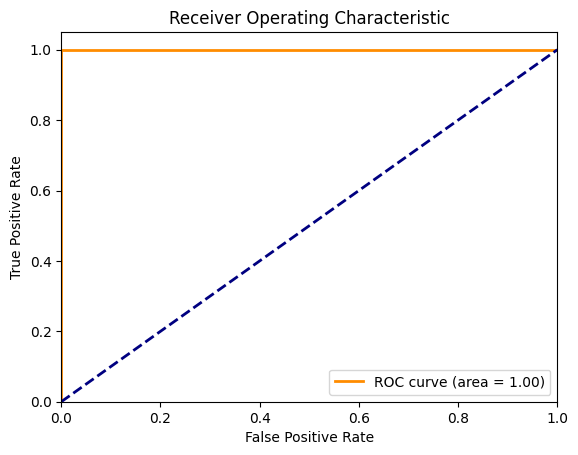

A:  [[-1.22131371  0.50489829]] B:  [-83.20997884]
Auc Score:  1.0


In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ... [your existing code] ...

# Predict probabilities for X_test
Y_pred_proba = log.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("Auc Score: ", roc_auc)

#### Checking assumption log odds linearity

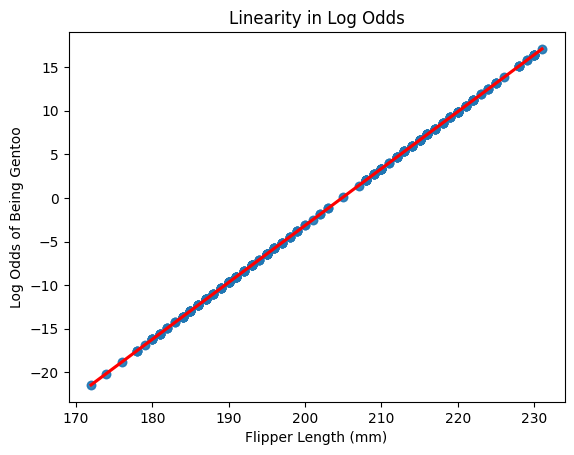

In [9]:
import seaborn as sns

# ... [rest of your code] ...

# Calculate predicted probabilities
Y_pred_proba = log.predict_proba(X)[:, 1]

# Convert probabilities to log odds
log_odds = np.log(Y_pred_proba / (1 - Y_pred_proba))

# Plotting
plt.scatter(X['flipper_length_mm'], log_odds, alpha=0.5)
sns.regplot(x='flipper_length_mm', y=log_odds, data=X, line_kws={'color': 'red'})
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Log Odds of Being Gentoo')
plt.title('Linearity in Log Odds')
plt.show()


## 3. SECOND CLASSIFICATION - 2 variables to 2 classes.

#### Training the model

A:  [[-1.22131371  0.50489829]] B:  [-83.20997884]
Accuracy:  0.9927007299270073


/Users/josepferrersanchez/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


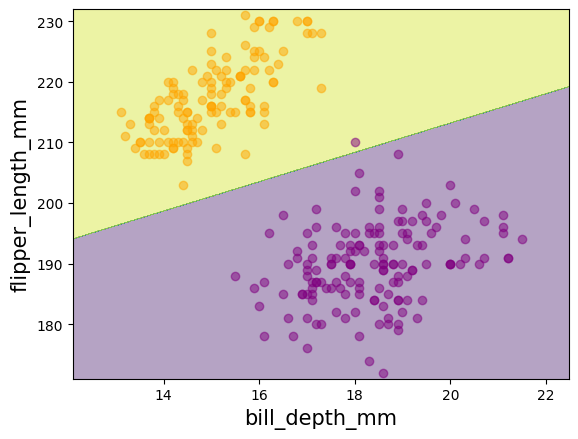

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Prepare the data
df_dummy = pd.get_dummies(df, dtype=int).sort_values(by='flipper_length_mm', ascending=True)

# Select the features and the target
X = df_dummy.iloc[:, 1:3]  # Assuming that the features are in the 3rd and 4th columns
Y = df_dummy["species_Gentoo"]

# Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=41)

# Fit the Logistic Regression model
log = LogisticRegression()
log.fit(X_train.values, Y_train)

# Create a grid to generate a matrix like view
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# We predict all points to plot the decision boundary
Z = log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

X1_gentoo = df_dummy[df_dummy["species_Gentoo"]==1]['bill_depth_mm'].values
X1_adelie = df_dummy[df_dummy["species_Gentoo"]==0]['bill_depth_mm'].values

X2_gentoo = df_dummy[df_dummy["species_Gentoo"]==1]['flipper_length_mm'].values
X2_adelie = df_dummy[df_dummy["species_Gentoo"]==0]['flipper_length_mm'].values

# Plot the scatter plot
plt.scatter(X1_gentoo, X2_gentoo, label='Gentoo', color='orange', alpha=0.5)
plt.scatter(X1_adelie, X2_adelie, label='Adelie', color='purple', alpha=0.5)
plt.xlabel("bill_depth_mm",fontsize=15)
plt.ylabel("flipper_length_mm",fontsize=15)

# Checking our accuracy
accuracy = log.score(X_test, Y_test)
print("A: ", log.coef_, "B: ", log.intercept_)
print("Accuracy: ", accuracy)


#### Evaluating the model

/Users/josepferrersanchez/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/josepferrersanchez/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Confusion Matrix:
 [[74  1]
 [ 0 62]]


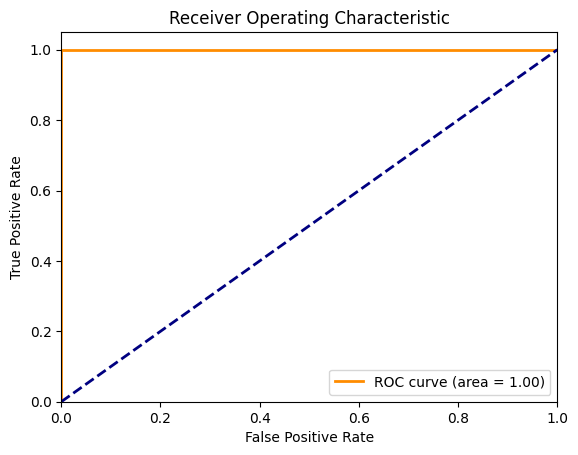

Auc Score:  1.0


In [11]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ... [your existing code] ...

# Predict probabilities for X_test
Y_pred_proba = log.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("Auc Score: ", roc_auc)

#### Checking assumptions

/Users/josepferrersanchez/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


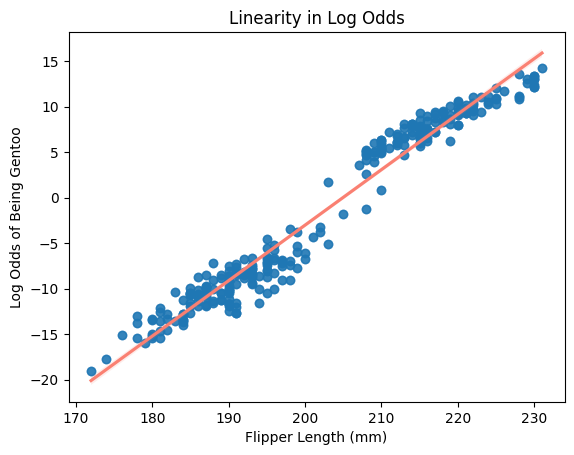

In [12]:
import seaborn as sns

# Calculate predicted probabilities
Y_pred_proba = log.predict_proba(X)[:, 1]

# Convert probabilities to log odds
log_odds = np.log(Y_pred_proba / (1 - Y_pred_proba))

# Plotting
plt.scatter(X['flipper_length_mm'], log_odds, alpha=0.5)
sns.regplot(x='flipper_length_mm', y=log_odds, data=X, line_kws={'color': 'salmon'})
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Log Odds of Being Gentoo')
plt.title('Linearity in Log Odds')
plt.show()


# ITIS CLASSIFICATION - SETOS, VERSICOLOR OR VIRGINICA?

## 1. Getting the data
Today we are dealing with some real-world data to apply our brand new logistic regression model. 
The second example we will see together is how to classify three different species of Iris - Setos, Versicolor and Virginica. 
We are using a Kaggle [Iris dataset](https://www.kaggle.com/datasets/uciml/iris).

In [5]:
# Load Iris dataset
df = pd.read_csv("Files/Logistic_regression/Iris.csv")
df = df.drop(columns=["Id"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Some first analysis
Some first analysis to further get the idea of what data we have in out table.

In [6]:
# Checking our dataset
df.describe() #describes are data 

df.info() #gives information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_23826/1613867963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Species"], palette=["purple", "orange", "red"])


<Axes: xlabel='count', ylabel='Species'>

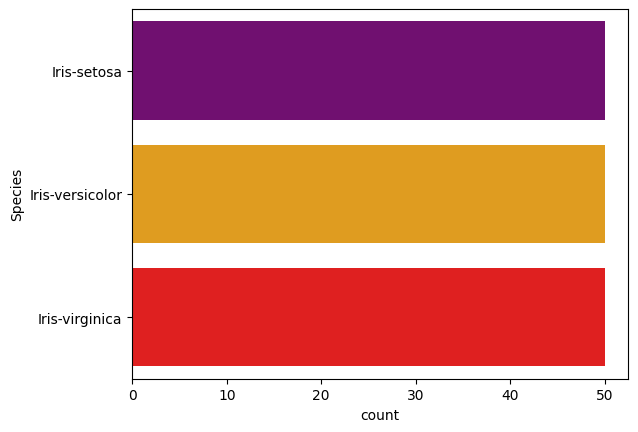

In [8]:
#We can check the distribution of individuals we have for each specie. Remember that strongly imabalanced datasets can be a problem. 
print(df["Species"].value_counts())
sns.countplot(df["Species"], palette=["purple", "orange", "red"])

## 3. Understanding our data
### HEATMAP
To understand what variables have a strong impact in our penguin species, we can use different commands. The first one is a Heat Map, that visually represents the correlation between all pairs of numeric columns within our DataFrame. The correlation range to 1 to -1 and indicates the strength and direction of their relationship.

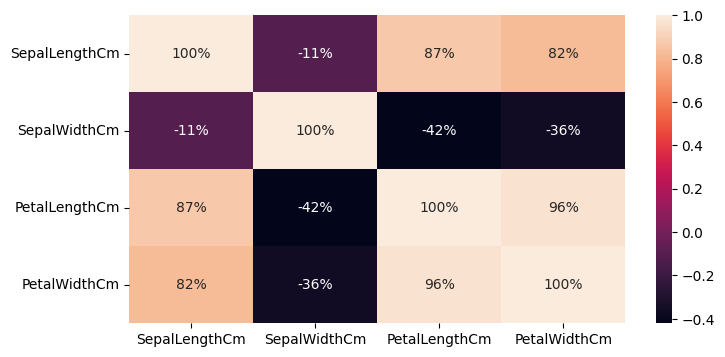

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 4))

import seaborn as sns
sns.heatmap(numeric_df.corr(), annot=True, fmt=".0%")
plt.show()

### PAIR PLOT
It generates a grid of scatter plots, each showing the relationship between two different variables in the dataset and with colors based on species. This provides an overview of how different variables interact and how these interactions vary by species.###

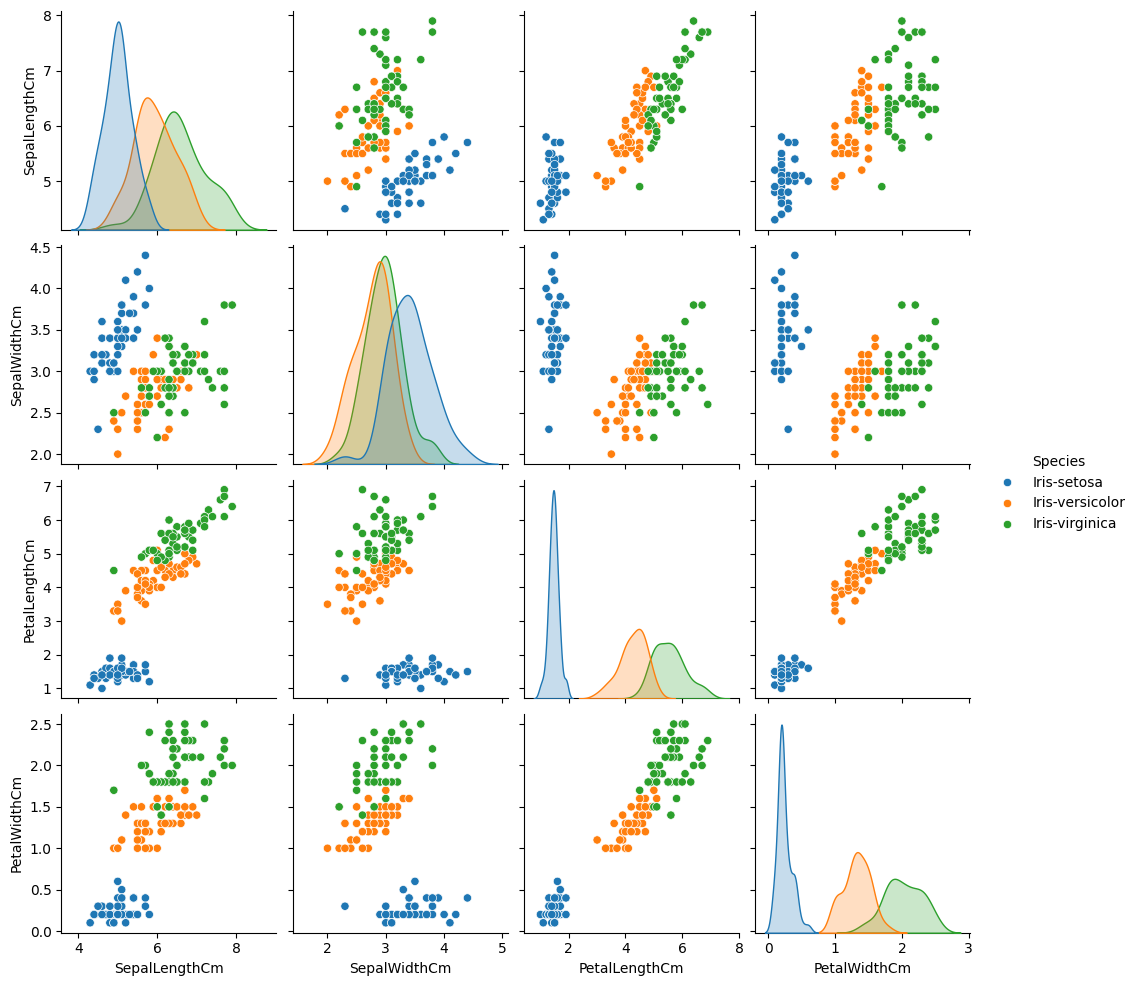

In [11]:
#let Create a pair plot of some columns 
sns.pairplot(df.iloc[:,:],hue='Species')  # graph also  tell us about the the realationship between the two columns 

## 3. FIRST CLASSIFICATION - 1 variable to 3 classes.
Training the model

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# One-hot encode the categorical data and sort by flipper_length_mm
df_dummy = pd.get_dummies(df, dtype=int)#.sort_values(by='flipper_length_mm', ascending=True)
df_dummy

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:


# Select the features and the target variable
X = df_dummy[['flipper_length_mm']]
Y = df_dummy["species_Gentoo"]

# Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=41)

# Fit the Logistic Regression model
log = LogisticRegression()
log.fit(X_train, Y_train)

# Define the sigmoid function
def sigmoid(x, A, B):
    return 1 / (1 + np.exp(-A*x - B))

# Apply the sigmoid function using the coefficients
# The .ravel() is used to convert the 2D array of coefficients to a 1D array for compatibility.
A = log.coef_
B = log.intercept_

# Create a range of values for X to plot the sigmoid function smoothly
X_range = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
Y_predicted = sigmoid(X_range, A, B)

# Plot the predicted probabilities
plt.plot(X_range, Y_predicted, label='Predicted')

X_gentoo = df_dummy[df_dummy["species_Gentoo"]==1]['flipper_length_mm'].values
X_adelie = df_dummy[df_dummy["species_Gentoo"]==0]['flipper_length_mm'].values

# Plot the actual values colored by class
plt.scatter(X_gentoo, Y[Y == 1], label='Gentoo', color='orange', alpha=0.5)
plt.scatter(X_adelie, Y[Y == 0], label='Adelie', color='purple', alpha=0.5)
plt.xlabel("flipper_length_mm",fontsize=15)
plt.ylabel("Specie",fontsize=15)

# Checking our accuracy
accuracy = log.score(X_test, Y_test)
print("Accuracy: ", accuracy)

print("A: ", log.coef_, "B: ", log.intercept_)

# Show the plot with legends
plt.legend()
plt.show()